In [ ]:
import os
import sys

# Check if __file__ is defined
if '__file__' in globals():
    # Running from a script
    script_dir = os.path.dirname(__file__)
else:
    # Running in an environment like Jupyter
    script_dir = os.getcwd()

# Add parent directory to sys.path
sys.path.append(os.path.join(script_dir, '..'))


import numpy as np
from dezero import *


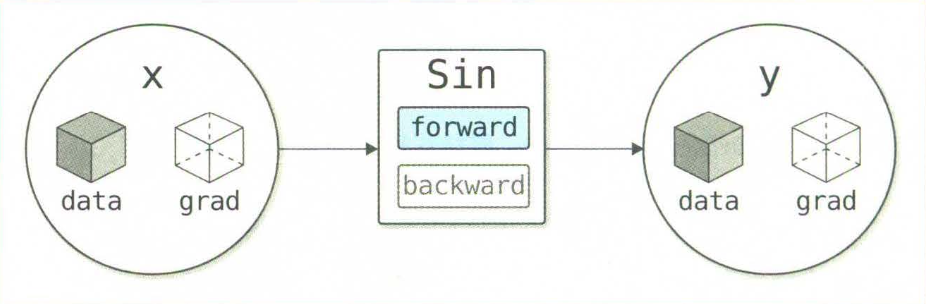

In [ ]:
class Sin(Function):
    def forward(self, x):
        return np.sin(x)
    
    def backward(self, gy):
        x = self.inputs[0].data
        xg = np.cos(x) * gy
        print("Sin.backward:", type(xg))
        return xg

def sin(x):
    return Sin()(x)

In [ ]:
import math

x = Variable(np.array([0, math.pi/6, math.pi/4, math.pi/3, math.pi/2]))
y = sin(x)
y.backward()
x.grad, y.data

In [ ]:
import math

x = Variable(np.array(1.0))

y = sin(x)
y.backward(retain_grad=True)
x.grad, y.data

用于求 y=sin(x)的导数的计算图 (gx是 y对 x的导数)

此时gx也是一个numpy.scalar，它是被Functions重载的运算符得出。即它经历一个forward过程，

如果将它改作 Variable 类型

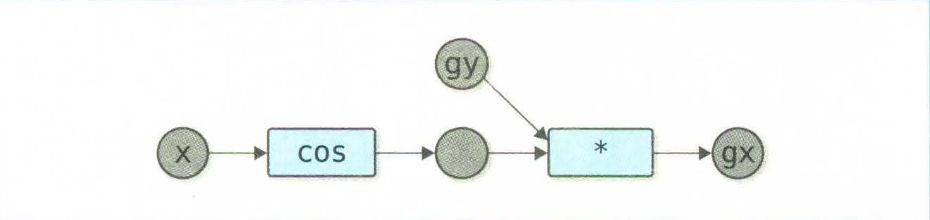

对其调用 backward() 来再求导一次得：

f''(x) = gx.backword()

In [ ]:
import math

x = Variable(np.array(1.0))

y = sin(x)
y.backward(retain_grad=True)
print(type(x.grad))

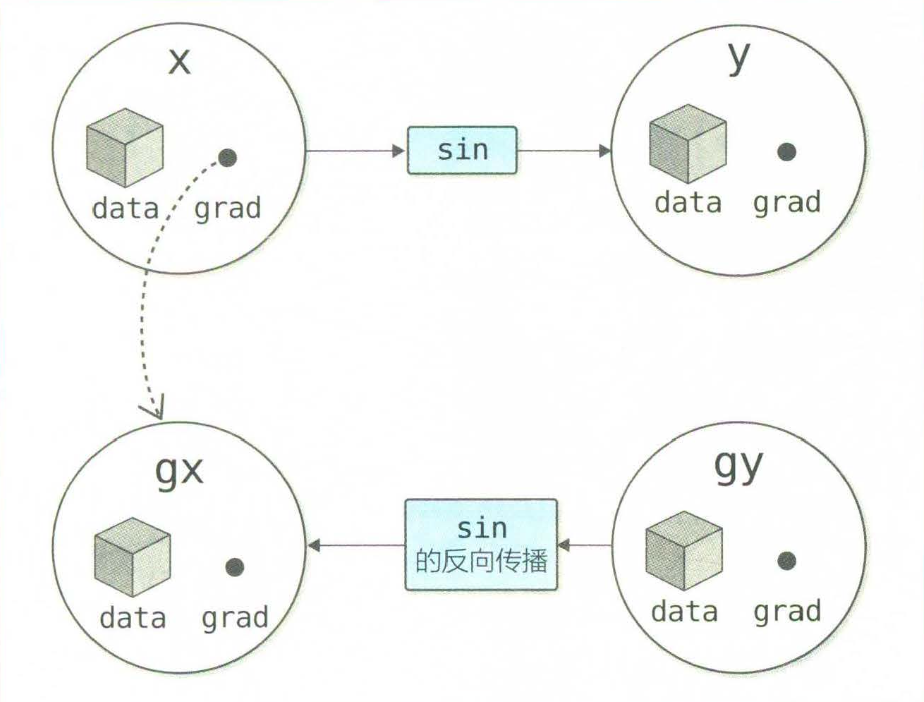

假定所有的backward所涉及的变量都是variable

gx = gy * cos(x)

这里gx的creator是Mul，即 gx.creator = Mul

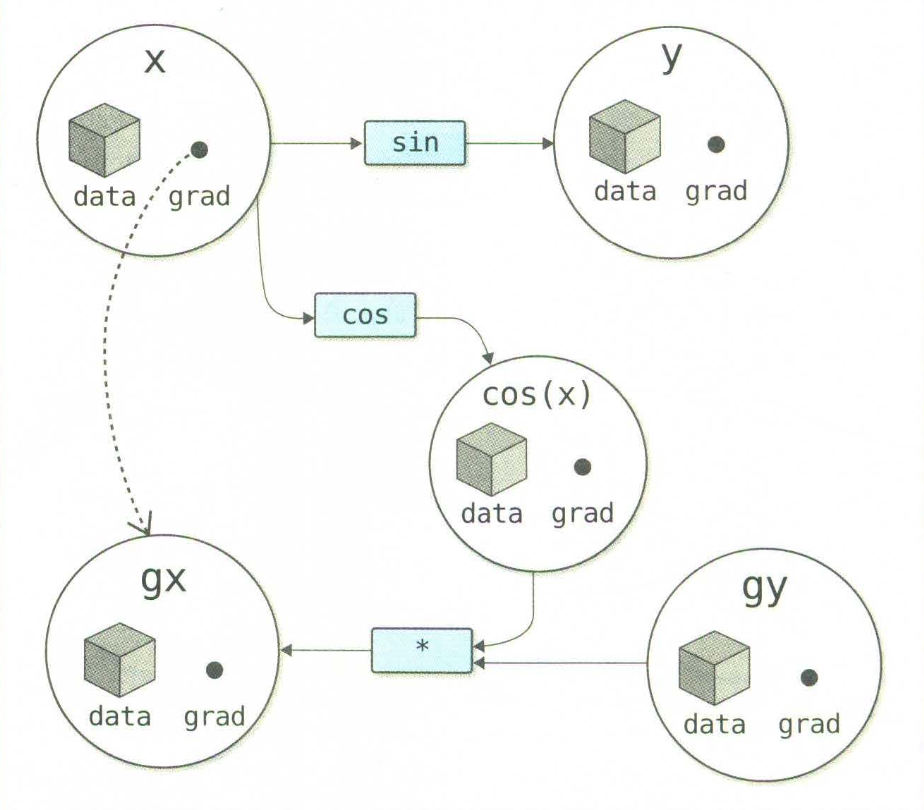